In [1]:
from analyser import *
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
p3_mock = Test("example.csv")
table = p3_mock.mark_table
df_normalized = p3_mock.marks(norm=True, to_one=True)

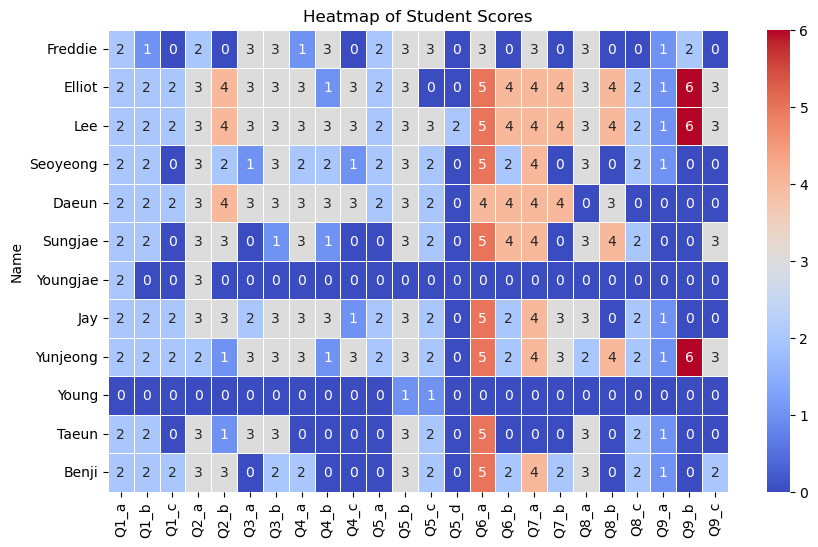

In [3]:
heatmap_data = table.set_index("Name")
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Student Scores")
plt.show()

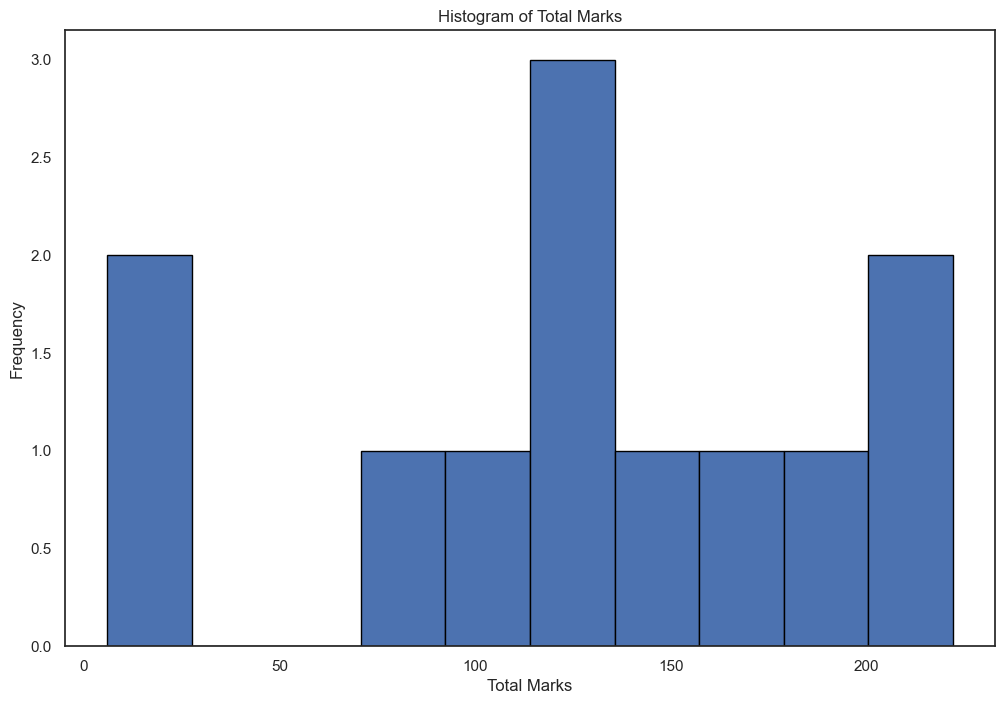

In [29]:
df_total_marks = p3_mock.get_total_marks()

# Plotting the histogram for total marks
plt.figure(figsize=(12, 8))
plt.hist(df_total_marks["Total"], bins=10, edgecolor="black")
plt.title("Histogram of Total Marks")
plt.xlabel("Total Marks")
plt.ylabel("Frequency")
plt.show()

In [28]:
# Pair plot requires a clean, small subset of the dataset
# Example: using the first 5 questions only
subset_columns = [
    col for col in df_heatmap.columns if col[0] in ["Q1", "Q2", "Q3", "Q4", "Q5"]
]
sns.pairplot(df_heatmap[subset_columns].reset_index())
plt.suptitle("Pair Plot of Normalized Marks for Selected Questions", y=1.02)
plt.show()

ValueError: No variables found for grid columns.